In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Life Expectancy Data.csv")

# Preview the first five rows
print(df.head())
print("\nData shape:", df.shape)

       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.

In [3]:
# Make a copy for cleaning
df_clean = df.copy()

# Fill missing numeric values with column medians
df_clean.fillna(df_clean.median(numeric_only=True), inplace=True)

# Create a log GDP column for log-linear modeling
import numpy as np
df_clean['log_GDP'] = np.log(df_clean['GDP'])

# Verify no remaining missing values in key columns
# Use df_clean.columns to get the actual column names and adjust accordingly
# Example: If the column name is 'Life expectancy ', replace it with the correct name
cols_to_check = [c for c in ['Life expectancy', 'Schooling', 'GDP', 'Total expenditure', 'log_GDP'] if c in df_clean.columns]
# or if you know the correct name for the column, you can directly change it here
# cols_to_check = ['Life expectancy ', 'Schooling', 'GDP', 'Total expenditure', 'log_GDP']
print(df_clean[cols_to_check].isnull().sum())

Schooling            0
GDP                  0
Total expenditure    0
log_GDP              0
dtype: int64


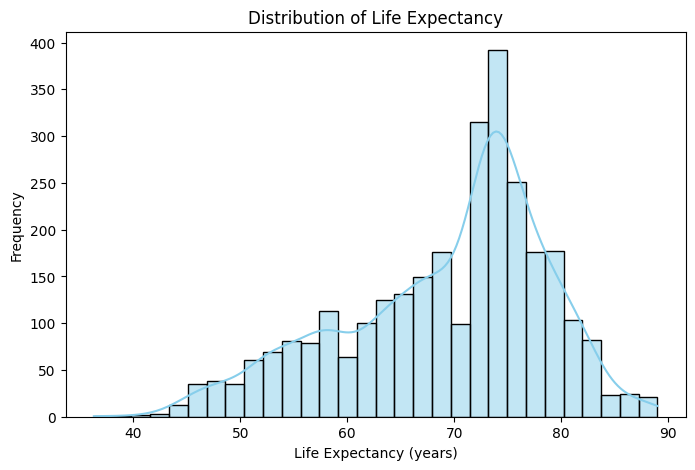

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Life Expectancy
plt.figure(figsize=(8,5))
# Access the column using its actual name, which might be 'Life expectancy '
# or another variation. You can find the correct name by printing df_clean.columns
sns.histplot(df_clean['Life expectancy '], bins=30, kde=True, color='skyblue') # Changed here to reflect actual column name
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Frequency')
plt.show()

<ipython-input-7-07496530c77c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Status', y='Life expectancy ', data=df_clean, palette='pastel')


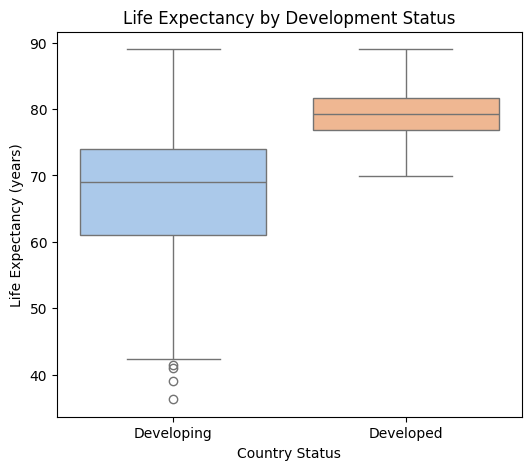

In [7]:
# Life Expectancy by development status (Developed vs Developing)
plt.figure(figsize=(6,5))
# Replace 'Life expectancy ' with the correct column name from your dataframe
# You can check the actual column names using: print(df_clean.columns)
sns.boxplot(x='Status', y='Life expectancy ', data=df_clean, palette='pastel')
plt.title('Life Expectancy by Development Status')
plt.xlabel('Country Status')
plt.ylabel('Life Expectancy (years)')
plt.show()

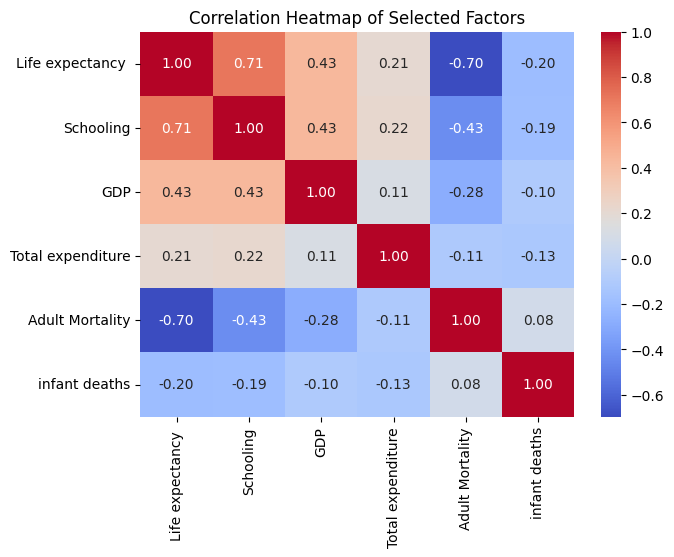

In [9]:
# Correlation heatmap for selected variables
plt.figure(figsize=(7,5))
# Adjust the column names to match the actual names in your dataframe
vars_of_interest = ['Life expectancy ', 'Schooling', 'GDP', 'Total expenditure', 'Adult Mortality', 'infant deaths']
# Replace 'Life expectancy ' with the actual column name if different
corr = df_clean[vars_of_interest].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Selected Factors')
plt.show()

In [11]:
#Model 1: Simple Linear Regression (Life Expectancy vs Schooling)

# Simple linear regression: Life Expectancy ~ Schooling
from sklearn.linear_model import LinearRegression

# Prepare data for model 1
# Correct the column name to 'Life expectancy ' (with a trailing space)
model1_data = df_clean.dropna(subset=['Life expectancy ','Schooling'])
X1 = model1_data[['Schooling']]
y1 = model1_data['Life expectancy ']  # Correct the column name here as well

# Fit linear model
model1 = LinearRegression().fit(X1, y1)

# Print model parameters and performance
print("Model 1 Coefficient (years of life per year of schooling):", model1.coef_[0])
print("Model 1 Intercept:", model1.intercept_)
print("Model 1 R^2:", model1.score(X1, y1))

Model 1 Coefficient (years of life per year of schooling): 2.0766369030515324
Model 1 Intercept: 44.294647562803604
Model 1 R^2: 0.5084453382044776


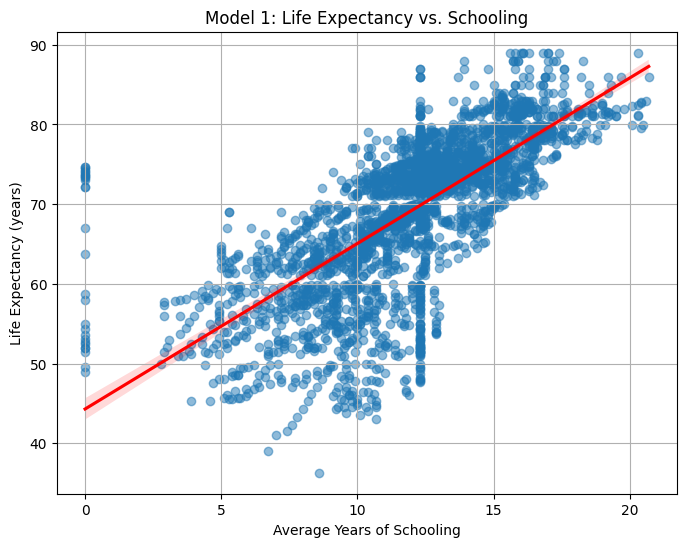

In [13]:
# Visualization of Model 1 with regression line
plt.figure(figsize=(8,6))
sns.regplot(x='Schooling', y='Life expectancy ', data=model1_data,
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Model 1: Life Expectancy vs. Schooling')
plt.xlabel('Average Years of Schooling')
plt.ylabel('Life Expectancy (years)')
plt.grid(True)
plt.show()

In [14]:
#Model 2: Multiple Linear Regression (Schooling, GDP, Health Expenditure)

# Multiple linear regression: Life Expectancy ~ Schooling + GDP + Total expenditure
# Corrected the column name in subset to 'Life expectancy '
model2_data = df_clean.dropna(subset=['Life expectancy ','Schooling','GDP','Total expenditure'])
X2 = model2_data[['Schooling','GDP','Total expenditure']]
# Corrected the column name here as well
y2 = model2_data['Life expectancy ']

# Fit linear model
model2 = LinearRegression().fit(X2, y2)

# Print model parameters and performance
print("Model 2 Coefficients:", list(zip(X2.columns, model2.coef_)))
print("Model 2 Intercept:", model2.intercept_)
print("Model 2 R^2:", model2.score(X2, y2))

Model 2 Coefficients: [('Schooling', np.float64(1.8555035030894014)), ('GDP', np.float64(0.000106749364451044)), ('Total expenditure', np.float64(0.20531387027817932))]
Model 2 Intercept: 45.02834810428891
Model 2 R^2: 0.5293824034848216


In [17]:
#Model 3: Log-Transformed Model (Life Expectancy vs Log(GDP))

# Log-linear regression: Life Expectancy ~ log(GDP)
# Correct the column name in subset to 'Life expectancy ' (with a trailing space)
model3_data = df_clean.dropna(subset=['Life expectancy ','GDP'])
X3 = np.log(model3_data[['GDP']])
# Correct the column name here as well to 'Life expectancy ' (with a trailing space)
y3 = model3_data['Life expectancy ']

# Fit linear model on log(GDP)
model3 = LinearRegression().fit(X3, y3)

# Print model parameters and performance
print("Model 3 Coefficient (years of life per log GDP unit):", model3.coef_[0])
print("Model 3 Intercept:", model3.intercept_)
print("Model 3 R^2:", model3.score(X3, y3))

Model 3 Coefficient (years of life per log GDP unit): 3.0678329296731217
Model 3 Intercept: 46.32254904914494
Model 3 R^2: 0.3110828587131652


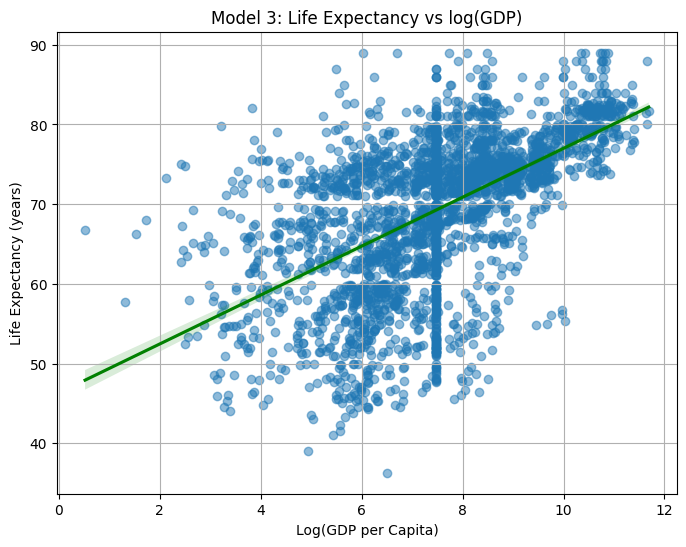

In [18]:
# Add a column for predicted values
model3_data['log_GDP'] = np.log(model3_data['GDP'])

# Plot
plt.figure(figsize=(8,6))
sns.regplot(x='log_GDP', y='Life expectancy ', data=model3_data,
            scatter_kws={'alpha':0.5}, line_kws={'color':'green'})
plt.title('Model 3: Life Expectancy vs log(GDP)')
plt.xlabel('Log(GDP per Capita)')
plt.ylabel('Life Expectancy (years)')
plt.grid(True)
plt.show()

Model 4 (KNN) R^2: 0.44666192525323156
Model 4 RMSE: 6.925052567397918


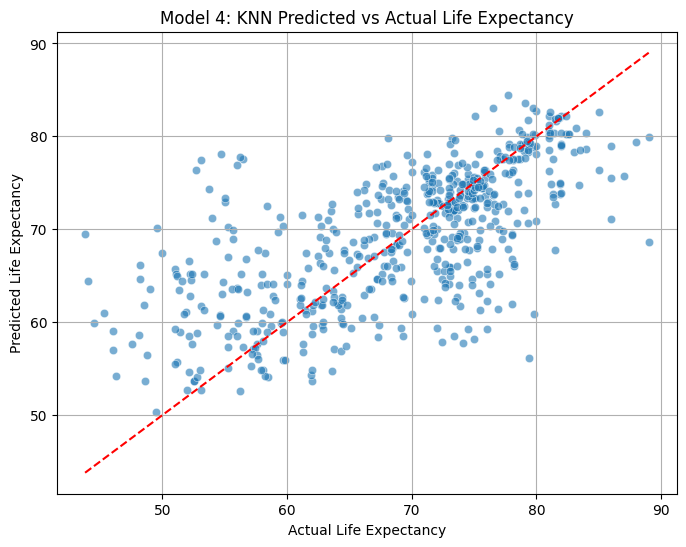

In [22]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Use the same predictors as Model 2
X4 = X2
y4 = y2

# Split into training and test sets
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=42)

# Fit KNN with k=5
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X4_train, y4_train)
y4_pred = knn.predict(X4_test)

# Evaluate
print("Model 4 (KNN) R^2:", r2_score(y4_test, y4_pred))
# Calculate RMSE manually or update scikit-learn
# Original: print("Model 4 RMSE:", mean_squared_error(y4_test, y4_pred, squared=False))
rmse = np.sqrt(mean_squared_error(y4_test, y4_pred)) # Calculate RMSE without 'squared'
print("Model 4 RMSE:", rmse)

# Visualization: predicted vs actual
plt.figure(figsize=(8,6))
sns.scatterplot(x=y4_test, y=y4_pred, alpha=0.6)
plt.plot([y4_test.min(), y4_test.max()], [y4_test.min(), y4_test.max()], color='red', linestyle='--')
plt.title('Model 4: KNN Predicted vs Actual Life Expectancy')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.grid(True)
plt.show()
